In [1]:
from src.board import BoardState
from matplotlib import pyplot as plt
from random import choice

# TODO
- Clean Notebook to essential
- Read about MCST implementation
- Optimize for MCST
- Test Numba
- Multi-process
- See for other AI model
- Write a full README

# Example of a random game

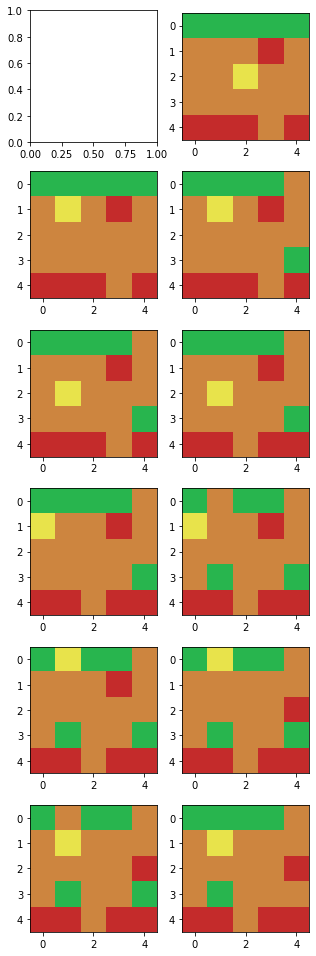

In [2]:
board = BoardState()
N = 5
fig, axs = plt.subplots(N + 1, 2)
fig.set_size_inches(5, 17)

board = choice(board.get_tokens_moves())
axs[0, 1].imshow(board.render_board_state())

for i in range(1, N + 1):
    board = choice(board.get_bobail_moves())
    axs[i, 0].imshow(board.render_board_state())
    board = choice(board.get_tokens_moves())
    axs[i, 1].imshow(board.render_board_state())

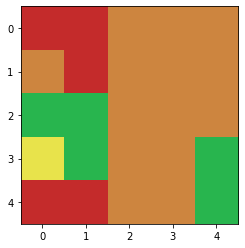

In [3]:
board = BoardState()

board = choice(board.get_tokens_moves())
pos = board._get_bobail_pos()

while (not board._is_bobail_stuck(pos)):
    board = choice(board.get_bobail_moves())
    board = choice(board.get_tokens_moves())
    
    pos = board._get_bobail_pos()
    
plt.imshow(board.render_board_state())

# CLI

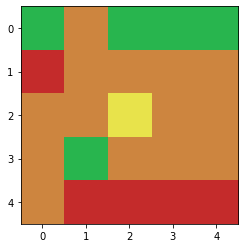

In [4]:
board = BoardState()
board.do_move((4,0), (1,0))
board.do_move((0,1), (3,1))

plt.imshow(board.render_board_state())

# AlphaBobail: Playing against a random bot
## Nomenclature to play
```
>>> ijkl
```
With $(i, j)$ the starting pos and $(k, l)$ the destination

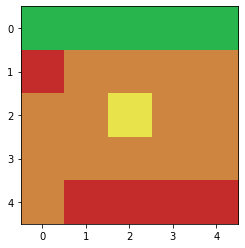

2212


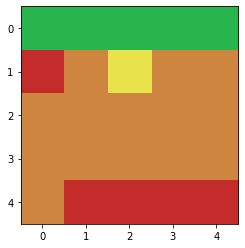

0131


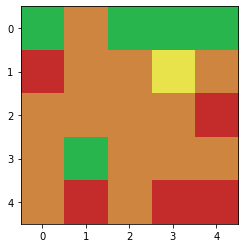

1314


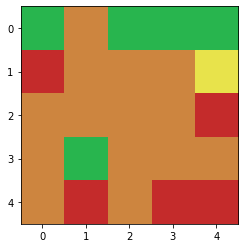

0333


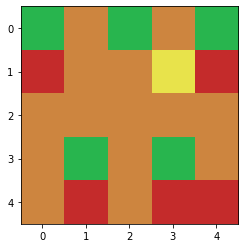

1303


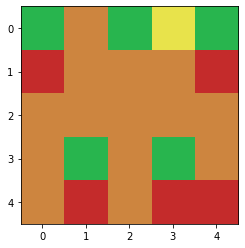

3313
THE WINNER IS: Player.GREEN


In [5]:
from src.player import Player

board = BoardState()
board = choice(board.get_tokens_moves())

def play():
    plt.imshow(board.render_board_state())
    plt.show()
    str_ = input()
    i,j,k,l = [int(s) for s in str_]
    board.do_move((i,j), (k,l))

while (board.get_state() is None):
    if (board.turn is Player.RED): # AI
        board = choice(board.get_bobail_moves())
        board = choice(board.get_tokens_moves())
    else:
        play() # bobail
        play() # token
        
print(f"THE WINNER IS: {board.get_state()}")

# Benchmark speed
## Default number of moves computation per minute

## Number of moves computation per minute with Numba

# AlphaBobail Zero: playing against an MCTS guided bot

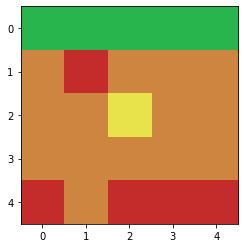

KeyboardInterrupt: Interrupted by user

In [3]:
from src.player import Player

board = BoardState()
board = choice(board.get_tokens_moves())

def play():
    plt.imshow(board.render_board_state())
    plt.show()
    str_ = input()
    i,j,k,l = [int(s) for s in str_]
    board.do_move((i,j), (k,l))

while (board.get_state() is None):
    if (board.turn is Player.RED): # AI
        board = board.get_best_move(batch_size=20)
    else:
        play() # bobail
        play() # token
        
print(f"THE WINNER IS: {board.get_state()}")

## AlphaBobail vs AlphaBobail Zero: A game of Titans
Goal: If AlphaBobail Zero wins more than 75% of the time, we can say that we achieve som kind of intelligence

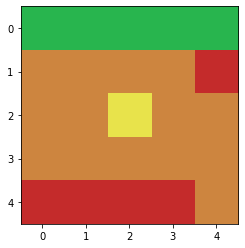

Moves played: 0


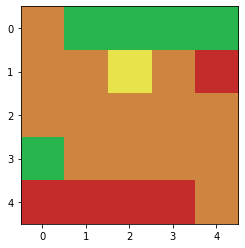

Moves played: 1


KeyboardInterrupt: 

In [3]:
from src.player import Player

board = BoardState()
board = choice(board.get_tokens_moves())
plt.imshow(board.render_board_state())
plt.show()

moves_played = 0
while (board.get_state() is None):
    print(f"Moves played: {moves_played}")
    moves_played += 1
    if (board.turn is Player.RED): # AI
        board = board.get_best_move(batch_size=20)
        
        plt.imshow(board.render_board_state())
        plt.show()
    else:
        board = choice(board.get_bobail_moves())
        board = choice(board.get_tokens_moves())
       
        plt.imshow(board.render_board_state())
        plt.show()
        
print(f"THE WINNER IS: {board.get_state()}")

In [ ]:
from src.player import Player

NB_GAME = 20

GAME_WON = 0
for game_id in range(NB_GAME):
    print(f"Games played (over {NB_GAME}): {game_id}")
    board = BoardState()
    board = choice(board.get_tokens_moves())
    
    while (board.get_state() is None):
        if (board.turn is Player.RED): # AI
            board = board.get_best_move(batch_size=20)
        else:
            board = choice(board.get_bobail_moves())
            board = choice(board.get_tokens_moves())
            
    if (board.get_state() == Player.RED):
        GAME_WON += 1
        
print(f"The AlphaBobail Zero's win rate is: {(GAME_WON / NB_GAME)*100:.2f}%")

Games played (over 20): 0
Games played (over 20): 1
Games played (over 20): 2
